LAB M1.03 Sklearn Model Training & Evaluation
Breast Cancer Prediction with KNN

Author: Cindy Lund
Description: Predict whether a breast tumor is malignant or benign using KNN

In [1]:
#Import necessary libraries and tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [2]:
#Loading the breast cancer dataset
print("Loading breast cancer dataset...")
cancer_data = load_breast_cancer()



Loading breast cancer dataset...


In [3]:
#Exploring the dataset - it is a bunch of objects with "data", "target", "feature_names", and "target_names" attributes 

print(f"\nDataset type: {type(cancer_data)}")
print(f"Number of samples: {len(cancer_data.data)}")
print(f"Number of features: {len(cancer_data.feature_names)}")
print(f"Target classes: {cancer_data.target_names}")



Dataset type: <class 'sklearn.utils._bunch.Bunch'>
Number of samples: 569
Number of features: 30
Target classes: ['malignant' 'benign']


In [4]:
#Converting to DataFrame for easier manipulation
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df["target"] = cancer_data.target


In [5]:
print("\nFirst few rows:")
print(df.head())

print("\nDataset info:")
df.info()

print("\nTarget distribution:")
print(df["target"].value_counts())
print(f"Malignant (0): {(df['target'] == 0).sum()}")
print(f"Benign (1): {(df['target'] == 1).sum()}")



First few rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area 

In [6]:
# Explore the dataset
df.head()
df.info()
df["target"].value_counts()


<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         569 non-null

target
1    357
0    212
Name: count, dtype: int64


BASIC STATISTICS
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.0

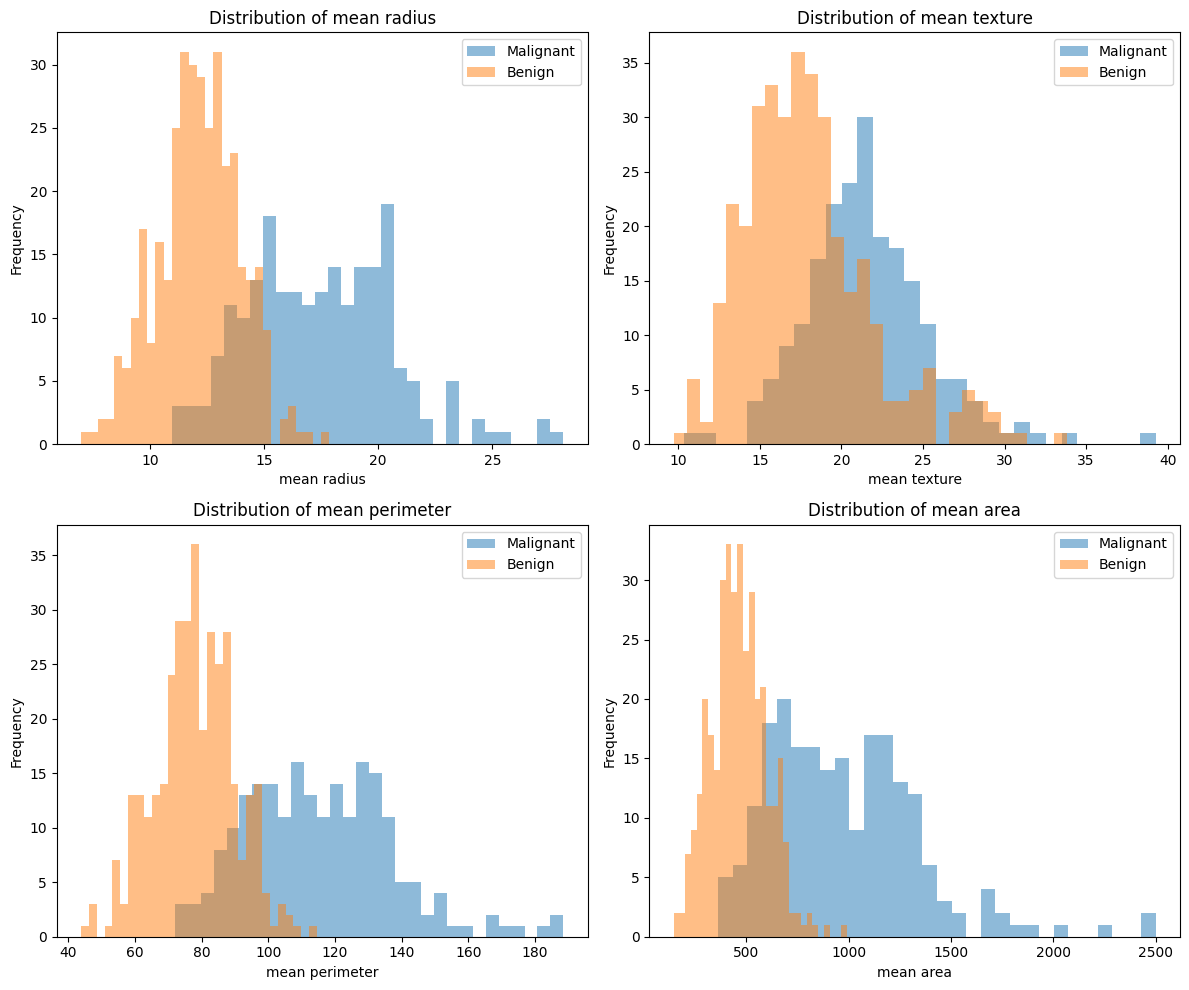

In [7]:
# Basic statistics
print("\n" + "="*50)
print("BASIC STATISTICS")
print("="*50)
print(df.describe())

# Check for missing values
print("\n" + "="*50)
print("MISSING VALUES")
print("="*50)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing[missing > 0])

# Visualize feature distributions (select a few key features)
print("\n" + "="*50)
print("FEATURE DISTRIBUTIONS")
print("="*50)

# Select a few representative features to visualize
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].hist(df[df['target'] == 0][feature], alpha=0.5, label='Malignant', bins=30)
    axes[idx].hist(df[df['target'] == 1][feature], alpha=0.5, label='Benign', bins=30)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=150, bbox_inches='tight')
print("Saved visualization to 'feature_distributions.png'")
plt.show()


In [8]:
# tep 3: Splitting the Data
# Separate features and target
X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']  # Target column

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split into training and testing sets
# random_state ensures reproducibility
# stratify=y ensures both sets have similar class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("\n" + "="*50)
print("DATA SPLIT")
print("="*50)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training features: {X_train.shape[1]}")
print(f"Test features: {X_test.shape[1]}")

# Verify class distribution in both sets
print("\nTraining set target distribution:")
print(y_train.value_counts())
print(f"  Malignant (0): {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"  Benign (1): {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")

print("\nTest set target distribution:")
print(y_test.value_counts())
print(f"  Malignant (0): {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")
print(f"  Benign (1): {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")


Features shape: (569, 30)
Target shape: (569,)

DATA SPLIT
Training set size: 455 samples
Test set size: 114 samples
Training features: 30
Test features: 30

Training set target distribution:
target
1    285
0    170
Name: count, dtype: int64
  Malignant (0): 170 (37.4%)
  Benign (1): 285 (62.6%)

Test set target distribution:
target
1    72
0    42
Name: count, dtype: int64
  Malignant (0): 42 (36.8%)
  Benign (1): 72 (63.2%)


In [9]:
#Step 4: Training the KNN Classifier
# Create KNN classifier
# n_neighbors=5 means the model will look at the 5 nearest neighbors to make a prediction

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("KNN classifier trained successfully!")
print(f"Number of neighbors (k): {knn.n_neighbors}")

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print(f"\nTraining predictions: {len(y_train_pred)}")
print(f"Test predictions: {len(y_test_pred)}")


KNN classifier trained successfully!
Number of neighbors (k): 5

Training predictions: 455
Test predictions: 114


In [10]:
#Step 5 Making Predictions and Evaluating the Model
print(f"Number of test samples: {len(y_test)}")
print(f"Number of predictions: {len(y_test_pred)}")

comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_test_pred
})

comparison_df.head(10)

comparison_df["Actual Label"] = comparison_df["Actual"].map({0: "Malignant", 1: "Benign"})
comparison_df["Predicted Label"] = comparison_df["Predicted"].map({0: "Malignant", 1: "Benign"})

comparison_df[["Actual Label", "Predicted Label"]].head(10)

correct = (y_test_pred == y_test).sum()
total = len(y_test)

print(f"Correct predictions: {correct} out of {total}")




Number of test samples: 114
Number of predictions: 114
Correct predictions: 104 out of 114


In [11]:
#Step 5 Making Predictions and Evaluating the Model
# 1) Build a comparison table for every test sample
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_test_pred
})

# 2) Add a column that shows if it's correct
comparison_df["Correct?"] = comparison_df["Actual"] == comparison_df["Predicted"]

# 3) (Optional) add readable labels
comparison_df["Actual Label"] = comparison_df["Actual"].map({0: "Malignant", 1: "Benign"})
comparison_df["Predicted Label"] = comparison_df["Predicted"].map({0: "Malignant", 1: "Benign"})

# 4) Display ALL predictions (114 rows)
comparison_df


,Actual,Predicted,Correct?,Actual Label,Predicted Label
0,0,0,True,Malignant,Malignant
1,1,1,True,Benign,Benign
2,0,0,True,Malignant,Malignant
3,1,0,False,Benign,Malignant
4,0,0,True,Malignant,Malignant
...,...,...,...,...,...
109,0,0,True,Malignant,Malignant
110,1,1,True,Benign,Benign
111,0,0,True,Malignant,Malignant
112,1,1,True,Benign,Benign


In [12]:
#Step 6 Evaluating Model Performance
# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# In this dataset: 0 = malignant, 1 = benign
# Decide what you want as the "positive" class.
# Common medical choice: treat "malignant" as the positive class (pos_label=0)
test_precision = precision_score(y_test, y_test_pred, pos_label=0)
test_recall = recall_score(y_test, y_test_pred, pos_label=0)

# Confusion matrix in sklearn is:
# [[TN, FP],
#  [FN, TP]] with respect to the chosen positive class,
# but easiest is to control label order explicitly.
# We'll print it in order [malignant (0), benign (1)] to match target_names.
test_confusion = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

print("=== Model Performance ===")
print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("\n(Positive class = Malignant (0))")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

print("\n=== Confusion Matrix (rows=Actual, cols=Predicted) ===")
print("                 Predicted")
print("             Malignant  Benign")
print(f"Actual Malignant   {test_confusion[0,0]:4d}     {test_confusion[0,1]:4d}")
print(f"Actual Benign      {test_confusion[1,0]:4d}     {test_confusion[1,1]:4d}")

print("\n=== Classification Report ===")
# cancer_data.target_names is ['malignant', 'benign'] in that order (0 then 1)
print(classification_report(y_test, y_test_pred, target_names=cancer_data.target_names))


=== Model Performance ===

Training Accuracy: 0.9473 (94.73%)
Test Accuracy: 0.9123 (91.23%)

(Positive class = Malignant (0))
Test Precision: 0.8636
Test Recall: 0.9048

=== Confusion Matrix (rows=Actual, cols=Predicted) ===
                 Predicted
             Malignant  Benign
Actual Malignant     38        4
Actual Benign         6       66

=== Classification Report ===
              precision    recall  f1-score   support

   malignant       0.86      0.90      0.88        42
      benign       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114




EXPERIMENTING WITH DIFFERENT K VALUES
K= 1: Accuracy=0.9211, Precision=0.8667, Recall=0.9286
K= 3: Accuracy=0.9298, Precision=0.9048, Recall=0.9048
K= 5: Accuracy=0.9123, Precision=0.8636, Recall=0.9048
K= 7: Accuracy=0.9298, Precision=0.9048, Recall=0.9048
K= 9: Accuracy=0.9386, Precision=0.9268, Recall=0.9048
K=11: Accuracy=0.9386, Precision=0.9268, Recall=0.9048

Best K value: 9 (Accuracy: 0.9386)

Saved visualization to 'knn_k_comparison.png'


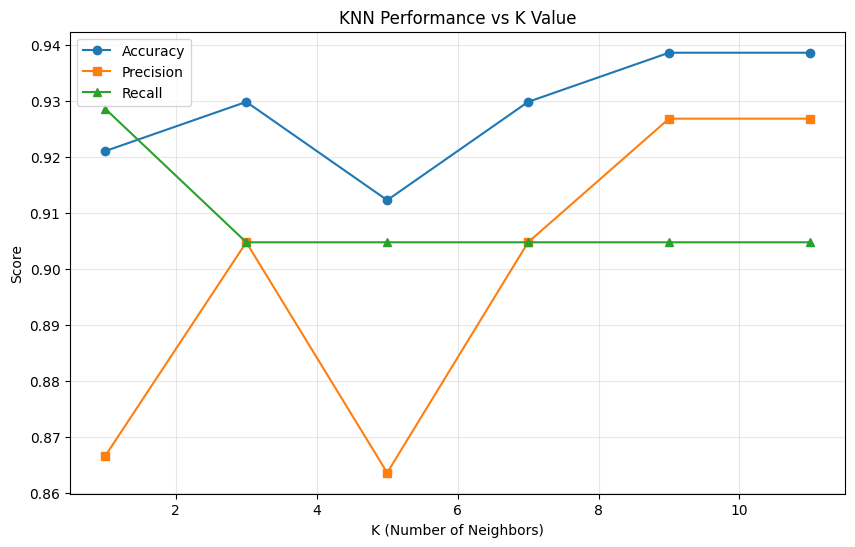

In [13]:
#Step 7 Experimenting with Different k Values
# Experiment with different K values
print("\n" + "="*50)
print("EXPERIMENTING WITH DIFFERENT K VALUES")
print("="*50)

k_values = [1, 3, 5, 7, 9, 11]
results = []

for k in k_values:
    # Create and train model
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    
    # Make predictions
    y_pred_temp = knn_temp.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred_temp)
    
    # IMPORTANT: malignant (0) is treated as the positive class
    prec = precision_score(y_test, y_pred_temp, pos_label=0)
    rec = recall_score(y_test, y_pred_temp, pos_label=0)
    
    results.append({
        'K': k,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec
    })
    
    print(f"K={k:2d}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")

# Find best K (based on accuracy)
results_df = pd.DataFrame(results)
best_k = results_df.loc[results_df['Accuracy'].idxmax(), 'K']
print(f"\nBest K value: {best_k} (Accuracy: {results_df['Accuracy'].max():.4f})")

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(results_df['K'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['K'], results_df['Precision'], marker='s', label='Precision')
plt.plot(results_df['K'], results_df['Recall'], marker='^', label='Recall')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Score')
plt.title('KNN Performance vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('knn_k_comparison.png', dpi=150, bbox_inches='tight')
print("\nSaved visualization to 'knn_k_comparison.png'")
plt.show()
